<a href="https://colab.research.google.com/github/jitbnerejee4/jit/blob/fastai/hindi_bengali_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'handwritten/'

Mounted at /content/gdrive


In [5]:
path = Path(base_dir); path

PosixPath('/content/gdrive/My Drive/handwritten')

In [0]:
classes = ['hindi_poems', 'bengali_poems']

In [7]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

hindi_poems


bengali_poems


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.5,
        ds_tfms=get_transforms(), size=229).normalize(imagenet_stats)

In [9]:
data.classes

['bengali_poems', 'hindi_poems']

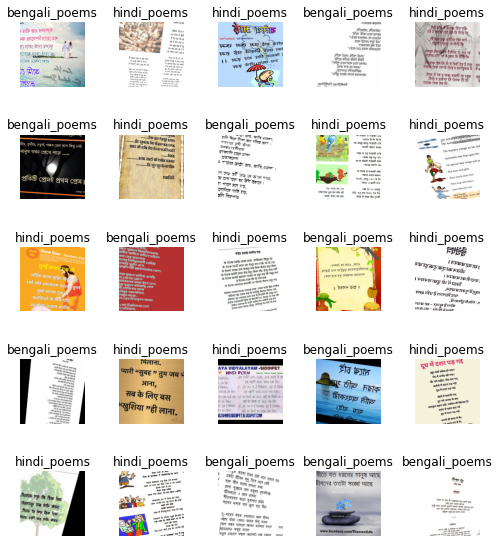

In [10]:
data.show_batch(rows=5, figsize=(7,8))


In [11]:
print(data.classes)
len(data.classes),data.c

['bengali_poems', 'hindi_poems']


(2, 2)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [13]:
learn.fit_one_cycle(5, max_lr=1e-02)

epoch,train_loss,valid_loss,error_rate,time
0,1.140568,1.021060,0.332599,00:09
1,1.034767,1.169728,0.290749,00:09
2,0.856048,1.002194,0.244493,00:09
3,0.711277,0.739336,0.233480,00:09
4,0.600931,0.650627,0.211454,00:09


In [0]:
learn.save('stage-1')

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

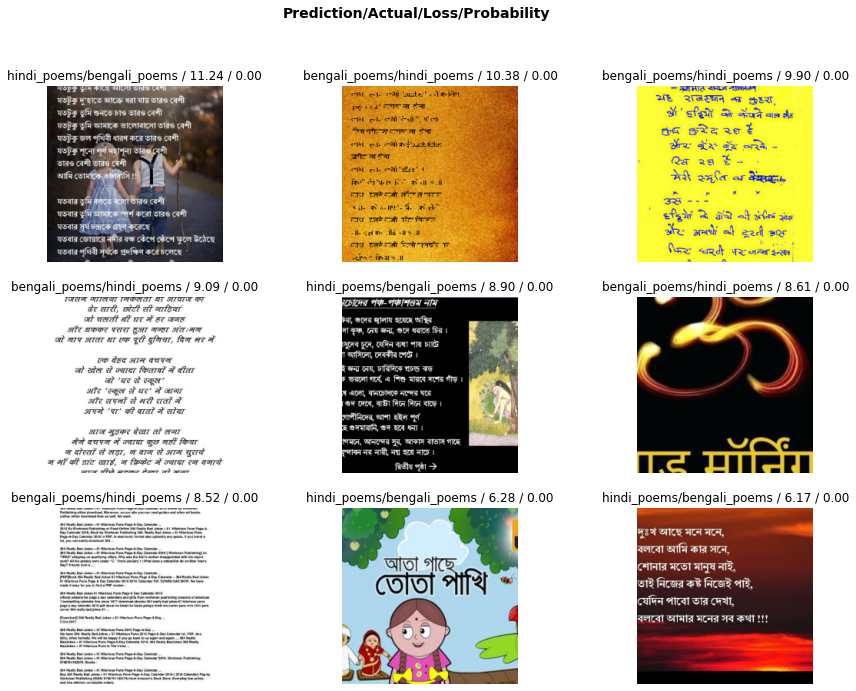

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

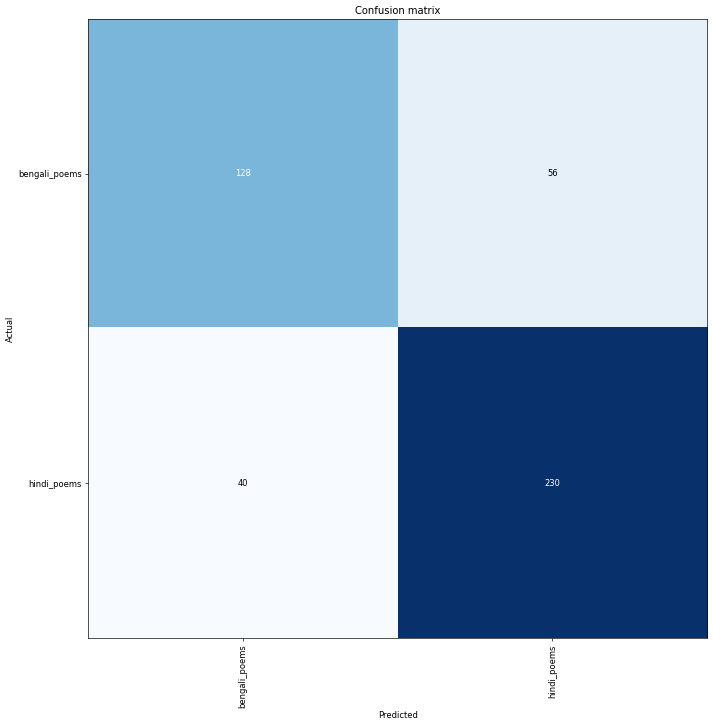

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(5, max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.316875,0.621844,0.187225,00:10
1,0.256125,0.808639,0.200441,00:10
2,0.235011,0.714671,0.182819,00:10
3,0.193340,0.604880,0.167401,00:10
4,0.183646,0.576450,0.158590,00:10


In [0]:
learn.save('stage-02')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

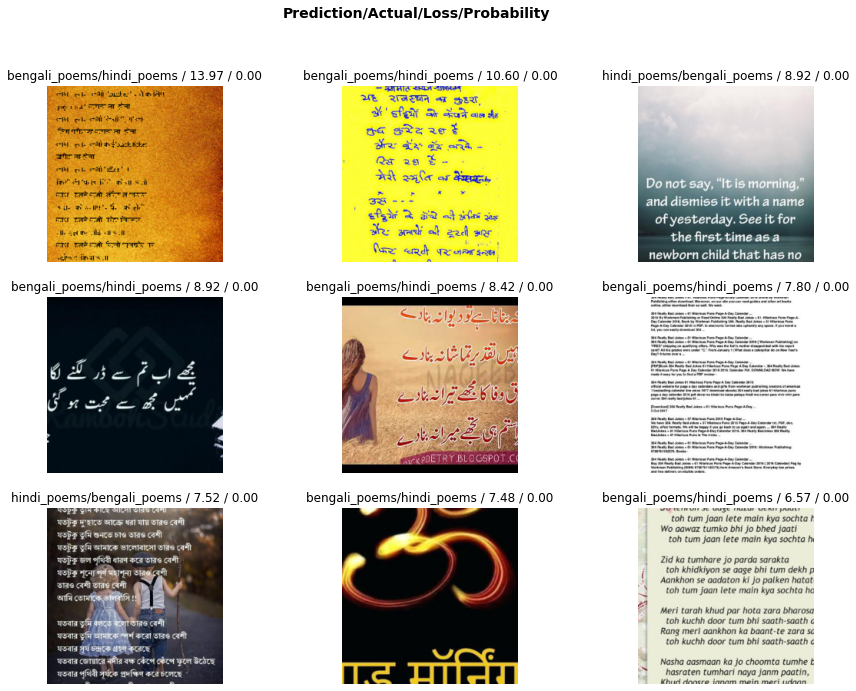

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

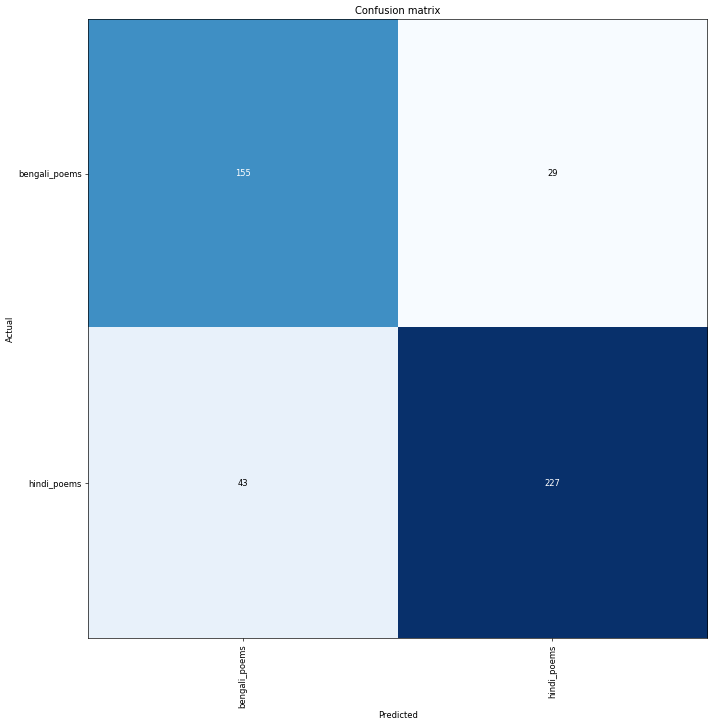

In [23]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [27]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [28]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

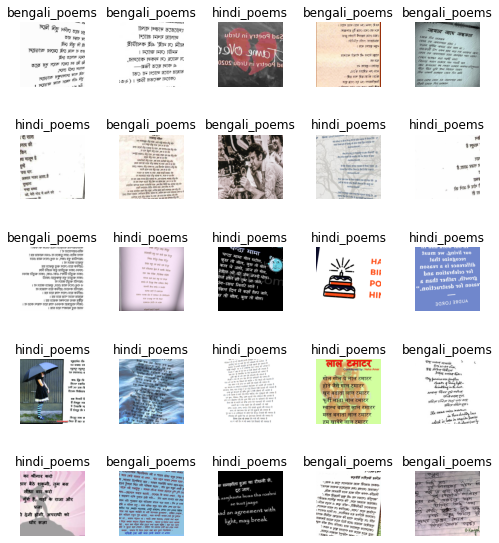

In [33]:
data.show_batch(rows=5, figsize=(7,8))

In [0]:
learn_cln = cnn_learner(data, models.resnet34, metrics=error_rate)

learn_cln.load('stage-02');

In [36]:
learn_cln.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.402880,0.432272,0.127072,00:11
1,0.363324,0.360192,0.138122,00:10
2,0.335855,0.346866,0.132597,00:10
3,0.309229,0.334997,0.121547,00:10
4,0.279668,0.325533,0.116022,00:10


In [38]:
interp = ClassificationInterpretation.from_learner(learn_cln)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

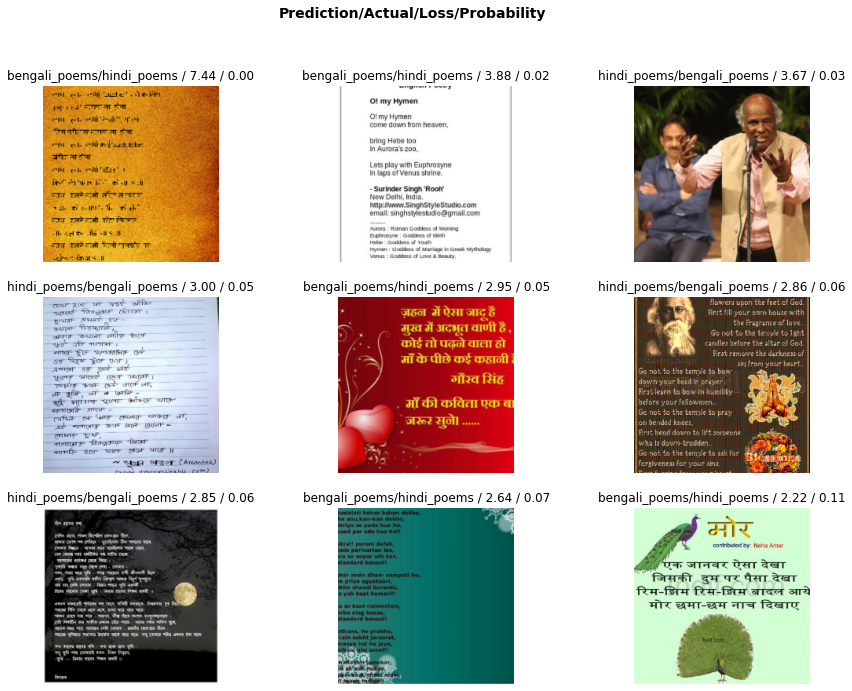

In [39]:
interp.plot_top_losses(9, figsize=(15,11))